In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [3]:
dataframe = pd.read_excel('train.xlsx')

In [4]:
dataframe.shape

(3636, 2)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      3636 non-null   object
 1   News Headline  3636 non-null   object
dtypes: object(2)
memory usage: 56.9+ KB


In [6]:
dataframe.isnull().sum()

Sentiment        0
News Headline    0
dtype: int64

In [7]:
dataframe["Sentiment"].value_counts()

Sentiment
neutral     2159
positive    1022
negative     455
Name: count, dtype: int64

Labeling the sentiments as 0, 1, 2

In [8]:
dataframe.rename(columns={'News Headline': 'Headlines'}, inplace=True)
label_mapping = {"neutral": 0, "positive": 1, "negative": 2}
dataframe["Sentiment"] = dataframe["Sentiment"].map(label_mapping)

Verctorization of Headings

In [9]:
# Convert text data to numerical representations using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataframe["Headlines"])

# Convert sparse matrix to dense array
X = X.toarray()

Oversampling the Data

In [10]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, dataframe["Sentiment"])

In [11]:
y_resampled.value_counts()

Sentiment
0    2159
1    2159
2    2159
Name: count, dtype: int64

Data Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)

Model

In [13]:
num_classes = len(label_mapping)
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax'),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [14]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

History Plotting

In [15]:
history = nn_model.fit(X_train, y_train, epochs=40, batch_size=64, validation_split=0.2)

Epoch 1/40


65/65 [==============================] - 3s 23ms/step - loss: 1.0636 - accuracy: 0.4467 - val_loss: 0.9904 - val_accuracy: 0.6278
Epoch 2/40
65/65 [==============================] - 1s 16ms/step - loss: 0.9195 - accuracy: 0.6952 - val_loss: 0.9037 - val_accuracy: 0.7078
Epoch 3/40
65/65 [==============================] - 1s 16ms/step - loss: 0.7865 - accuracy: 0.8106 - val_loss: 0.8283 - val_accuracy: 0.7348
Epoch 4/40
65/65 [==============================] - 1s 16ms/step - loss: 0.6860 - accuracy: 0.8596 - val_loss: 0.8068 - val_accuracy: 0.7242
Epoch 5/40
65/65 [==============================] - 1s 16ms/step - loss: 0.6225 - accuracy: 0.8726 - val_loss: 0.7659 - val_accuracy: 0.7338
Epoch 6/40
65/65 [==============================] - 1s 16ms/step - loss: 0.5707 - accuracy: 0.8832 - val_loss: 0.7599 - val_accuracy: 0.7261
Epoch 7/40
65/65 [==============================] - 1s 17ms/step - loss: 0.5270 - accuracy: 0.8917 - val_loss: 0.7651 - val_accuracy: 0.7107
Epoch 8/40


Training Results

41/41 [==============================] - 0s 4ms/step - loss: 0.8146 - accuracy: 0.7508
Test Loss: 0.8146352767944336
Test Accuracy: 0.7507715821266174


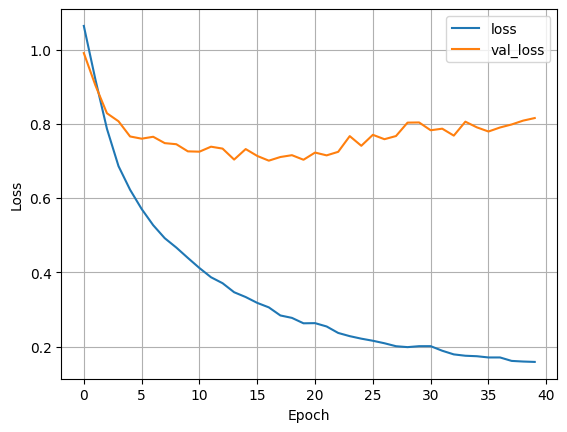

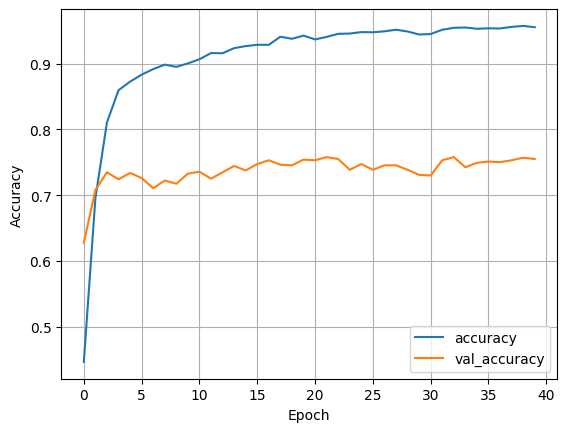

In [16]:
loss, accuracy = nn_model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
# Plot loss and accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Model Evaluation

In [17]:
def preprocess_headline(headline, vectorizer):
    # Transform headline into numerical representation using the trained vectorizer
    X = vectorizer.transform([headline])
    # Convert sparse matrix to dense array
    X = X.toarray()
    return X

# Function to predict sentiment for a single headline
def predict_sentiment(headline, model, vectorizer):
    # Preprocess headline
    X = preprocess_headline(headline, vectorizer)
    # Predict sentiment
    prediction = model.predict(X)
    # Convert prediction to sentiment label
    sentiment_labels = ["neutral", "positive", "negative"]
    predicted_sentiment = sentiment_labels[np.argmax(prediction)]
    return predicted_sentiment

headline_input = "Apple's new headquarters are to be built at the San Francisco subway station"
headline_input2 = "A data processing unit collects the data, calculates RVR values and provides the data to users via various interfaces."
headline_input3 = "The company is studying the feasibility of focusing most of its processed meat production in the Vantaa facilities and the processing of fresh meat in the Forssa facilities."
headline_input4 = "A high court in Finland has fined seven local asphalt companies more than   lion ( $ 117 million ) for operating a cartel ."
headline_input5 = "In addition to Russia, we now seek additional growth in Ukraine."


predicted_sentiment = predict_sentiment(headline_input, nn_model, vectorizer)
predicted_sentiment2 = predict_sentiment(headline_input2, nn_model, vectorizer)
predicted_sentiment3 = predict_sentiment(headline_input3, nn_model, vectorizer)
predicted_sentiment4 = predict_sentiment(headline_input4, nn_model, vectorizer)
predicted_sentiment5 = predict_sentiment(headline_input5, nn_model, vectorizer)

# Print the predicted sentiment for the input headline
print(f"The predicted sentiment for the headline '{headline_input}' is: {predicted_sentiment}")
print(f"The predicted sentiment for the headline '{headline_input2}' is: {predicted_sentiment2}")
print(f"The predicted sentiment for the headline '{headline_input3}' is: {predicted_sentiment3}")
print(f"The predicted sentiment for the headline '{headline_input4}' is: {predicted_sentiment4}")
print(f"The predicted sentiment for the headline '{headline_input5}' is: {predicted_sentiment5}")

1/1 [==============================] - 0s 49ms/step
The predicted sentiment for the headline 'Apple's new headquarters are to be built at the San Francisco subway station' is: neutral
The predicted sentiment for the headline 'A data processing unit collects the data, calculates RVR values and provides the data to users via various interfaces.' is: neutral
The predicted sentiment for the headline 'The company is studying the feasibility of focusing most of its processed meat production in the Vantaa facilities and the processing of fresh meat in the Forssa facilities.' is: neutral
The predicted sentiment for the headline 'A high court in Finland has fined seven local asphalt companies more than   lion ( $ 117 million ) for operating a cartel .' is: neutral
The predicted sentiment for the headline 'In addition to Russia, we now seek additional growth in Ukraine.' is: positive


In [18]:
import pickle
filename = 'savemodel.sav'
pickle.dump(nn_model,open(filename,'wb'))

In [19]:
vectorizer_filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(vectorizer_filename, 'wb'))